In [2219]:
import pandas as pd
from pathlib import Path
data_dir = Path("datasets")

# HR promotions: predict is_promoted
filepath = data_dir / 'HR analytics' / 'promotions.csv'
promotions = pd.read_csv(filepath)
promotions.shape

# 4.a 54808 examples
# 4.b 13 features, 1 label

(54808, 14)

In [2220]:
promotions.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2221]:
promotions = promotions.rename(columns=str.lower)

In [2222]:
promotions.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [2223]:
promotions_tmp = pd.get_dummies(promotions)
promotions_tmp.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206,-0.001291,0.007139,0.007994,-0.006410,-0.001602,0.005393,...,-0.006627,0.002578,0.001569,-0.006717,-0.007902,0.003565,-0.001755,-0.002584,-0.003680,0.002619,0.001542,-0.001542,-0.005920,0.000269,0.005875
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.045791,0.018442,-0.070258,-0.037305,-0.077320,0.044313,...,-0.006121,-0.020172,-0.012706,-0.016540,0.005030,-0.032443,0.000939,0.041708,0.004562,-0.034053,-0.084501,0.084501,0.012225,-0.013615,-0.008358
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,-0.101895,-0.078936,-0.011725,-0.017628,0.084703,0.055369,...,-0.038732,0.031325,-0.031608,-0.061456,0.034153,-0.043523,-0.059563,-0.252190,-0.174815,0.363260,0.016293,-0.016293,0.017304,-0.042124,-0.005225
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320,0.059118,0.030330,0.025813,0.007979,0.124803,-0.009425,...,-0.020509,0.033923,-0.026234,-0.012994,0.019127,0.007900,-0.035021,-0.005466,0.012444,0.016968,0.024232,-0.024232,-0.016076,0.070667,-0.003986
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,-0.071945,-0.054025,-0.009162,-0.041259,0.065956,0.042237,...,-0.026017,0.028181,-0.018111,-0.041024,0.026352,-0.032593,-0.040693,-0.173673,-0.119119,0.249536,0.019675,-0.019675,0.007202,-0.030292,0.001513
kpis_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582,0.035938,0.028987,-0.008013,-0.005239,0.084272,0.020728,...,-0.013528,0.032275,-0.028187,-0.010575,0.005167,0.013520,-0.030154,0.007507,0.012278,0.010452,0.037400,-0.037400,-0.006551,0.047621,-0.007178
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871,0.002445,0.006487,-0.006513,0.000822,-0.000285,0.002018,...,-0.001276,0.005968,-0.008006,-0.002163,-0.001804,-0.000198,-0.001018,0.001885,-0.004691,-0.000773,-0.002381,0.002381,0.005006,0.003004,-0.005902
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147,0.521961,-0.052132,-0.214788,-0.036579,-0.120764,0.194926,...,-0.003410,-0.010095,0.028359,-0.019396,0.012904,0.002419,-0.015341,0.003753,0.014050,0.030857,0.024494,-0.024494,-0.001999,0.030496,-0.006805
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000,0.012369,-0.003109,-0.022262,-0.017011,0.009113,0.015548,...,-0.015147,0.038031,-0.016838,-0.015693,0.023841,-0.001676,-0.020817,-0.015988,-0.000849,0.029343,0.011109,-0.011109,-0.004879,0.018641,-0.000483
department_Analytics,-0.001291,0.045791,-0.101895,0.059118,-0.071945,0.035938,0.002445,0.521961,0.012369,1.000000,-0.072458,-0.070673,-0.045729,-0.168098,-0.127296,...,0.015609,-0.011087,-0.013509,-0.009029,-0.018174,-0.009028,0.029595,0.051893,-0.040164,-0.058052,-0.145173,0.145173,-0.000006,-0.012271,0.003554


In [2224]:
promotions = promotions.drop(['employee_id','region','department','gender','recruitment_channel','education'], axis=1)

# 5.a we reomved the above features

In [2225]:
promotions.head(20)

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0
5,2,31,3.0,7,0,0,85,0
6,1,31,3.0,5,0,0,59,0
7,1,33,3.0,6,0,0,63,0
8,1,28,4.0,5,0,0,83,0
9,1,32,5.0,5,1,0,54,0


In [2226]:
promotions.isna().mean()

no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
kpis_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [2227]:
promotions = pd.get_dummies(promotions)
promotions.head(10)


,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0
5,2,31,3.0,7,0,0,85,0
6,1,31,3.0,5,0,0,59,0
7,1,33,3.0,6,0,0,63,0
8,1,28,4.0,5,0,0,83,0
9,1,32,5.0,5,1,0,54,0


In [2228]:
promotions.isna().mean()

# 4.d there are still missing values in previous_year_rating

no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
kpis_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [2229]:
promotions.previous_year_rating = promotions.previous_year_rating.fillna(promotions.previous_year_rating.median())
promotions.isna().sum().sum()

# we filled the cells that have missing values with the median value

0

In [2230]:
promotions.head()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0


0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

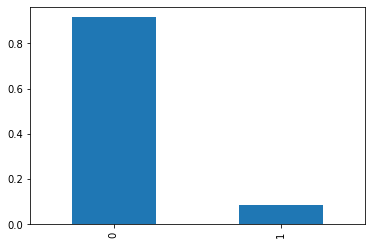

In [2231]:
promotions.is_promoted.value_counts(normalize=True).plot(kind='bar');
promotions.is_promoted.value_counts(normalize=True)

# 4.e distribution of the label 

In [2232]:
promotions.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


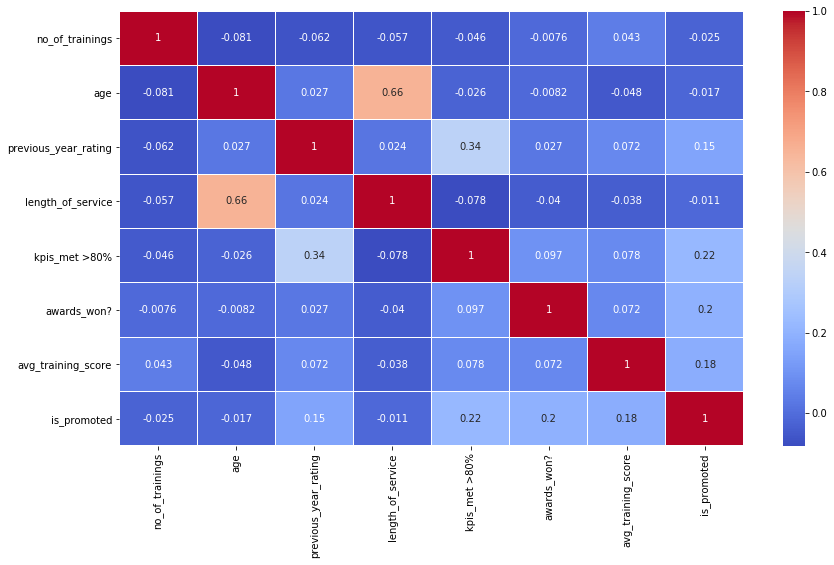

In [2233]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(promotions.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# 4.e correlation matrix

In [2234]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(promotions, test_size=11000, random_state=0, shuffle=True)
label = 'is_promoted'
X_train, y_train = train.drop(label, axis=1), train[label]
X_test, y_test = test.drop(label, axis=1), test[label]

In [2235]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# 4.a we have 43808 examples in the training set and 11000 in the test set

((43808, 7), (43808,), (11000, 7), (11000,))

In [2236]:
y_train.value_counts()

# 6.a.ii

0    40067
1     3741
Name: is_promoted, dtype: int64

In [2237]:
import numpy as np
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

benchmark_value = 0 # we set this benchmark value because of the train set majortiy values

y_train_pred = get_benchmark_predictions(X_train, benchmark_value)
y_test_pred = get_benchmark_predictions(X_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# 6.a.ii

In [2238]:
from sklearn.metrics import mean_squared_error


def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean squared error is {1:.4f} (mse train {2:.4f})'.format(model_name, mse, mse_train))
    return mse, mse_train, model_name

#6.a.i

In [2239]:
models_errors = {}
models_errors_train = {}

In [2240]:
class Benchmark:
    def fit(self, x, y):
        self.value = y.mean()
        return self
    
    def predict(self, x):
        return np.ones(len(x))*self.value
    
benchmark = Benchmark()
model_mse, model_mse_train, model_name = check_regressor(benchmark, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

# 6.a.i

Benchmark mean squared error is 0.0772 (mse train 0.0781)


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10073
           1       0.41      0.16      0.23       927

    accuracy                           0.91     11000
   macro avg       0.67      0.57      0.59     11000
weighted avg       0.88      0.91      0.89     11000



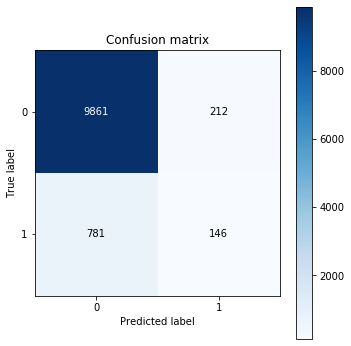

In [2241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))


# 6.b.i

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10073
           1       0.72      0.13      0.22       927

    accuracy                           0.92     11000
   macro avg       0.82      0.56      0.59     11000
weighted avg       0.91      0.92      0.90     11000



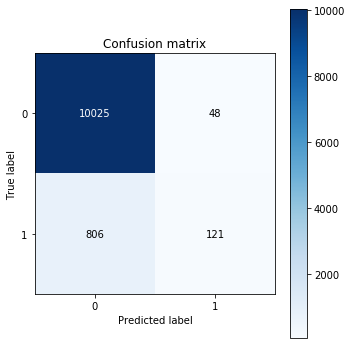

In [2242]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.i

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10073
           1       0.80      0.11      0.20       927

    accuracy                           0.92     11000
   macro avg       0.86      0.55      0.58     11000
weighted avg       0.91      0.92      0.90     11000



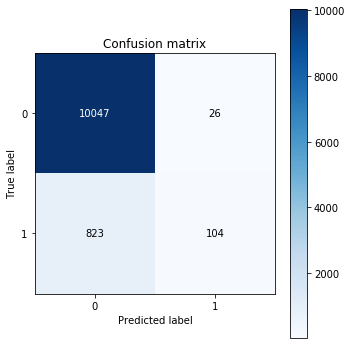

In [2243]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.i

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10073
           1       0.42      0.21      0.28       927

    accuracy                           0.91     11000
   macro avg       0.68      0.59      0.62     11000
weighted avg       0.89      0.91      0.90     11000



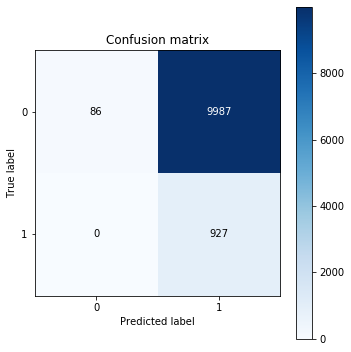

In [2244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.ii

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10073
           1       0.61      0.17      0.26       927

    accuracy                           0.92     11000
   macro avg       0.77      0.58      0.61     11000
weighted avg       0.90      0.92      0.90     11000



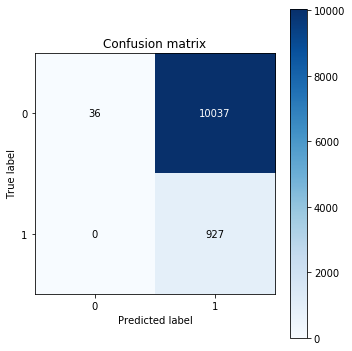

In [2245]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

train_acc, test_acc

def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.ii

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10073
           1       0.78      0.13      0.23       927

    accuracy                           0.92     11000
   macro avg       0.86      0.57      0.59     11000
weighted avg       0.91      0.92      0.90     11000



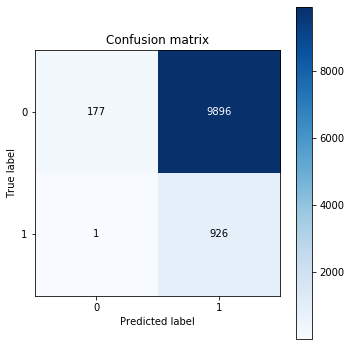

In [2246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.ii

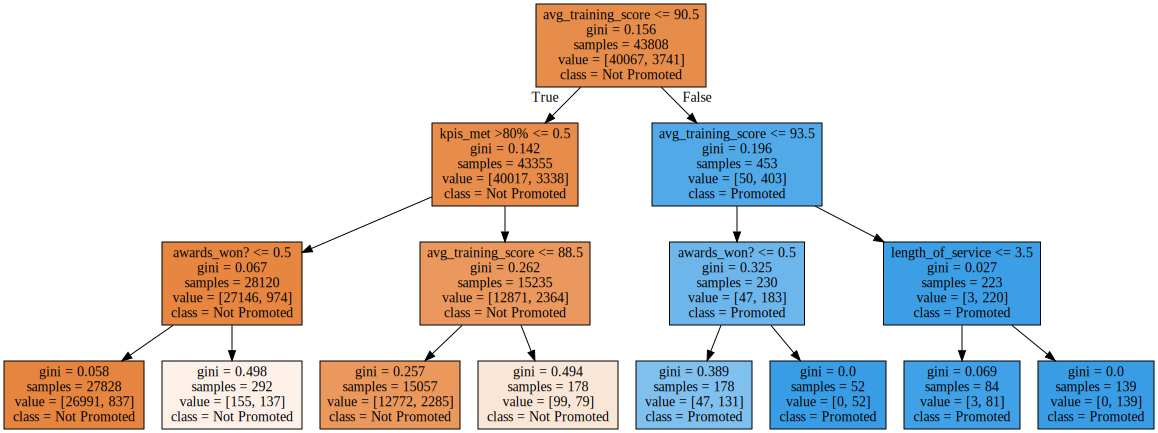

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10073
           1       0.83      0.11      0.20       927

    accuracy                           0.92     11000
   macro avg       0.88      0.56      0.58     11000
weighted avg       0.92      0.92      0.90     11000



In [2247]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 30
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
decision_tree.fit(X_train, y_train)
train_acc.append(decision_tree.score(X_train, y_train))
test_acc.append(decision_tree.score(X_test, y_test))

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

train_acc, test_acc

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(decision_tree, features=X_train.columns, labels=['Not Promoted', 'Promoted'])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.iii

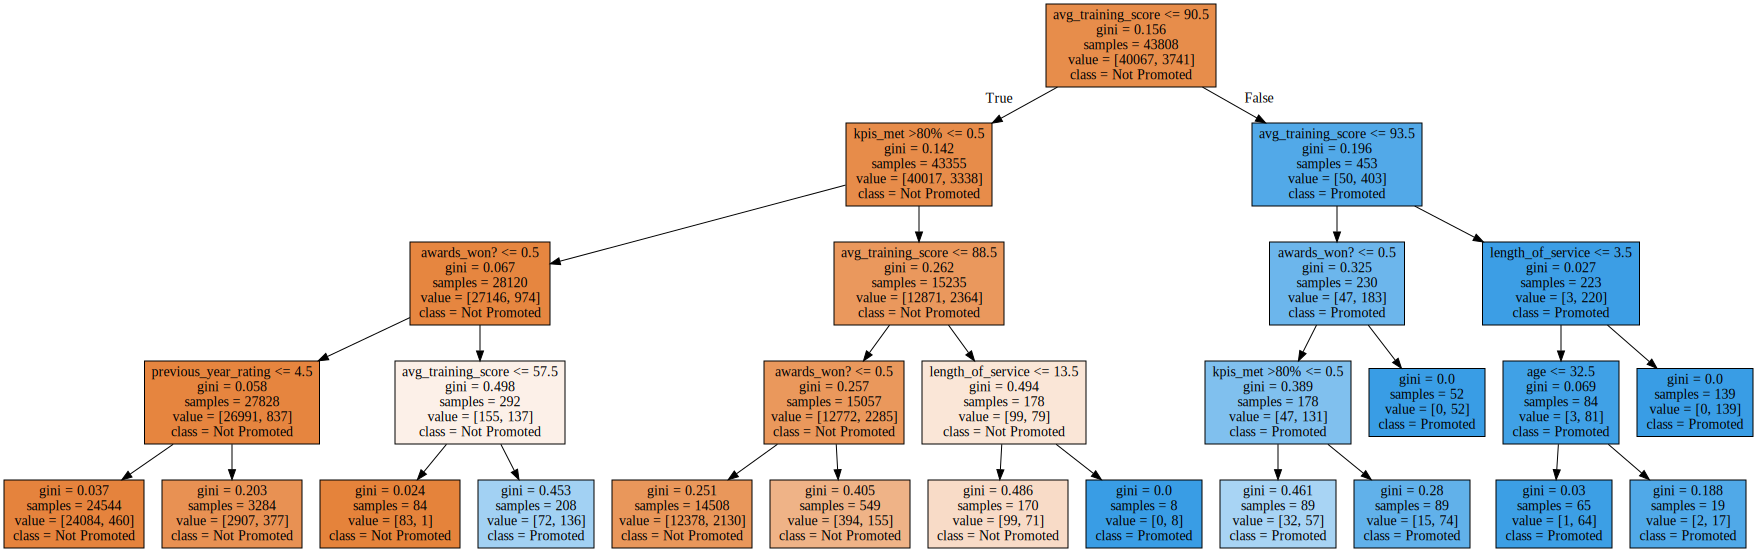

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10073
           1       0.78      0.17      0.27       927

    accuracy                           0.93     11000
   macro avg       0.86      0.58      0.62     11000
weighted avg       0.92      0.93      0.90     11000



In [2248]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 30
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

decision_tree = DecisionTreeClassifier(max_depth=4, random_state=0)
decision_tree.fit(X_train, y_train)
train_acc.append(decision_tree.score(X_train, y_train))
test_acc.append(decision_tree.score(X_test, y_test))

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

train_acc, test_acc

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(decision_tree, features=X_train.columns, labels=['Not Promoted', 'Promoted'])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.iii
# 7

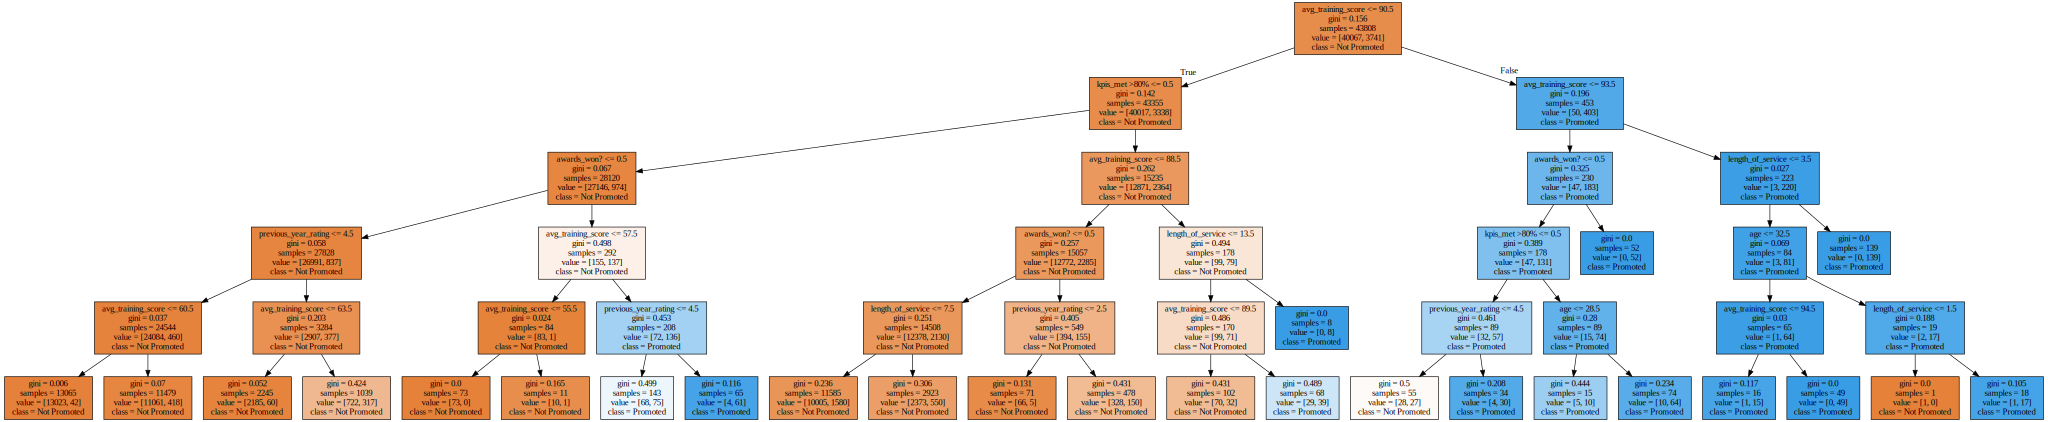

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10073
           1       0.81      0.16      0.27       927

    accuracy                           0.93     11000
   macro avg       0.87      0.58      0.61     11000
weighted avg       0.92      0.93      0.90     11000



In [2249]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 30
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
decision_tree.fit(X_train, y_train)
train_acc.append(decision_tree.score(X_train, y_train))
test_acc.append(decision_tree.score(X_test, y_test))

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

train_acc, test_acc

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(decision_tree, features=X_train.columns, labels=['Not Promoted', 'Promoted'])

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.iii
    

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10073
           1       0.91      0.11      0.20       927

    accuracy                           0.92     11000
   macro avg       0.92      0.56      0.58     11000
weighted avg       0.92      0.92      0.90     11000



,feature,importance
0,no_of_trainings,0.002245
1,age,0.007020
2,previous_year_rating,0.110499
3,length_of_service,0.004191
4,kpis_met >80%,0.249129
5,awards_won?,0.151825
6,avg_training_score,0.475091


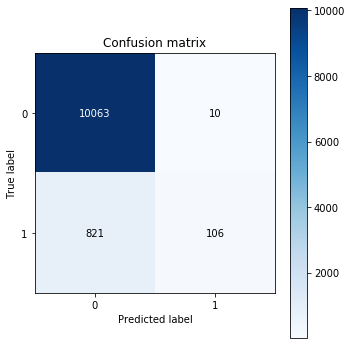

In [2250]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

feature_importances = random_forest.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.head(10)

#6.b.iv

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10073
           1       0.91      0.12      0.21       927

    accuracy                           0.92     11000
   macro avg       0.92      0.56      0.58     11000
weighted avg       0.92      0.92      0.90     11000



,feature,importance
0,no_of_trainings,0.002701
1,age,0.008293
2,previous_year_rating,0.109430
3,length_of_service,0.006718
4,kpis_met >80%,0.231206
5,awards_won?,0.137382
6,avg_training_score,0.504270


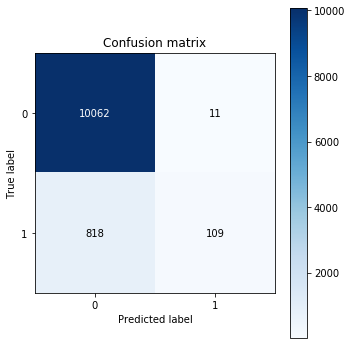

In [2251]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=4)
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

feature_importances = random_forest.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.head(10)

#6.b.iv

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10073
           1       0.91      0.13      0.23       927

    accuracy                           0.93     11000
   macro avg       0.92      0.57      0.60     11000
weighted avg       0.92      0.93      0.90     11000



,feature,importance
0,no_of_trainings,0.003914
1,age,0.012573
2,previous_year_rating,0.102643
3,length_of_service,0.013882
4,kpis_met >80%,0.227274
5,awards_won?,0.137446
6,avg_training_score,0.502268


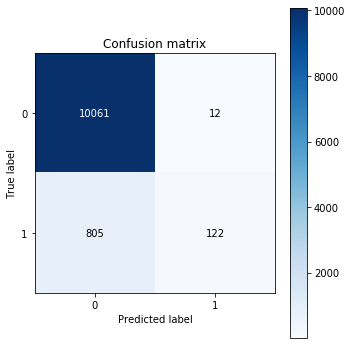

In [2252]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5)
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

feature_importances = random_forest.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.head(10)

#6.b.iv

In [2253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_precision = []

for k in range (1,7):
    random_forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=k)
    random_forest.fit(X_train, y_train)
    y_train_pred = random_forest.predict(X_train)
    y_test_pred = random_forest.predict(X_test)
    precision = precision_score(y_test, y_test_pred)
    test_precision.append(precision)
    
# 8    

C:\Users\aner\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No handles with labels found to put in legend.


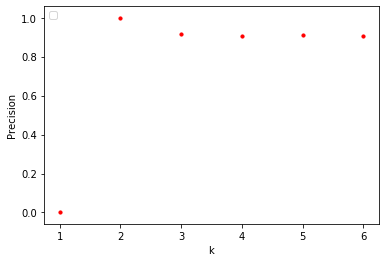

In [2254]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 7) ,test_precision, s=10, c='r', marker="o")
ax1.set_ylabel("Precision")
ax1.set_xlabel("k")

plt.legend(loc='upper left');
plt.show()

# 8 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10073
           1       0.90      0.14      0.25       927

    accuracy                           0.93     11000
   macro avg       0.92      0.57      0.60     11000
weighted avg       0.92      0.93      0.90     11000



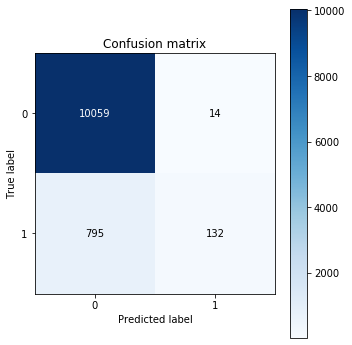

In [2255]:
from sklearn.ensemble import AdaBoostClassifier

Ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 6.b.v

In [2256]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
model_mse, model_mse_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

lasso = Lasso(alpha=0.5)
model_mse, model_mse_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

lasso = Lasso(alpha=0.2)
model_mse, model_mse_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

# 6.b.vi

Lasso mean squared error is 0.0772 (mse train 0.0781)
Lasso mean squared error is 0.0760 (mse train 0.0769)
Lasso mean squared error is 0.0749 (mse train 0.0758)


KNN: 0.106625 (0.011116)
DecisionTree: 0.108019 (0.008830)
RandomForest: 0.124398 (0.010717)
AdaBoost: 0.145616 (0.015129)


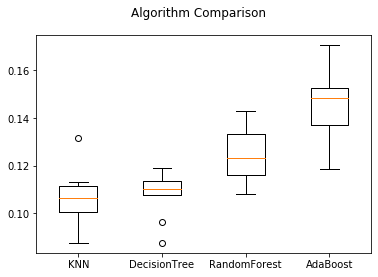

In [2257]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=3, random_state=0)))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100,max_depth=5)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5050
           1       0.93      0.15      0.26       431

    accuracy                           0.93      5481
   macro avg       0.93      0.57      0.61      5481
weighted avg       0.93      0.93      0.91      5481



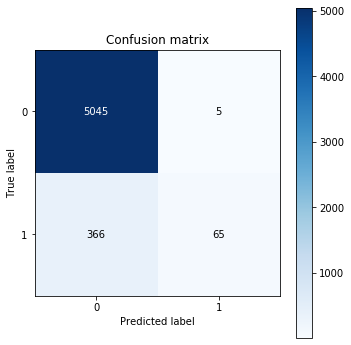

In [2258]:
X= promotions.drop('is_promoted',axis=1)
y=promotions['is_promoted']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)

from sklearn.ensemble import AdaBoostClassifier

Ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 9.a


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15110
           1       0.93      0.13      0.23      1333

    accuracy                           0.93     16443
   macro avg       0.93      0.57      0.60     16443
weighted avg       0.93      0.93      0.90     16443



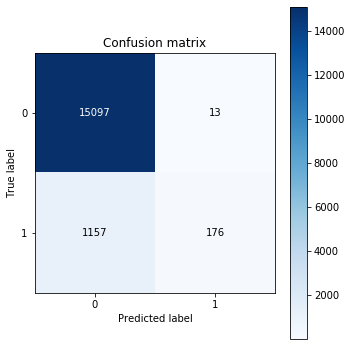

In [2259]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

from sklearn.ensemble import AdaBoostClassifier

Ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))
# 9.a

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     25152
           1       0.94      0.13      0.23      2252

    accuracy                           0.93     27404
   macro avg       0.93      0.56      0.60     27404
weighted avg       0.93      0.93      0.90     27404



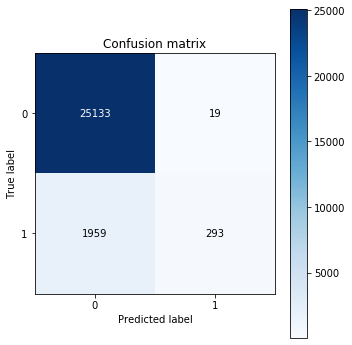

In [2260]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5,random_state=42)

from sklearn.ensemble import AdaBoostClassifier

Ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))
# 9.a

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     35152
           1       0.94      0.13      0.23      3214

    accuracy                           0.93     38366
   macro avg       0.93      0.57      0.60     38366
weighted avg       0.93      0.93      0.90     38366



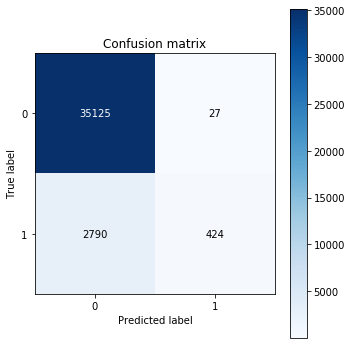

In [2261]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.7,random_state=42)

from sklearn.ensemble import AdaBoostClassifier

Ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 9.a

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



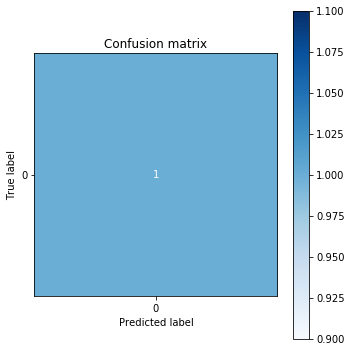

In [2262]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1,random_state=42)

from sklearn.ensemble import AdaBoostClassifier

Ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# 9.a